# Deep Learning with MNIST-ANN-one hot encoding

# Stage 1: Import dependencies for the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

C:\Users\Ad\Anaconda3\envs\newenvt\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Stage 2: Dataset preprocessing

In [2]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
60000
(60000,)


In [3]:
#to verify our complex daaset is imported correctly

#code will run if conditions met else wont run and will print theerror messagethatwe have specified below
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


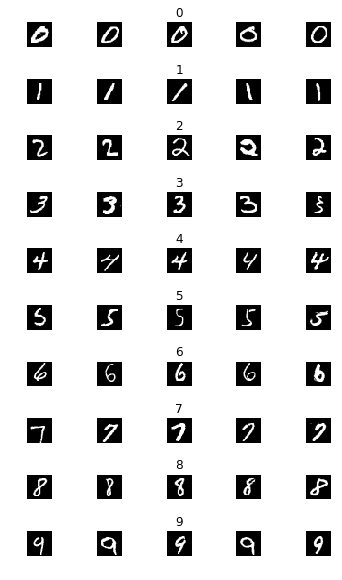

In [4]:
num_of_samples = []
 
cols = 5  #this is not fixed . we are just taking 5columns to see thevariations in mnist data for current label
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()  #plots can overlap. it will handle that issue and avoid plot overlap
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        #random.randint(0, len(x_selected - 1))-to select any of the 60000 images
        # :,:  used to define next 2 parameters means full slicing i.e 28,28 image size
        axs[j][i].axis("off")  #turning the axis off
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))  #appening the length of individual arrays

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

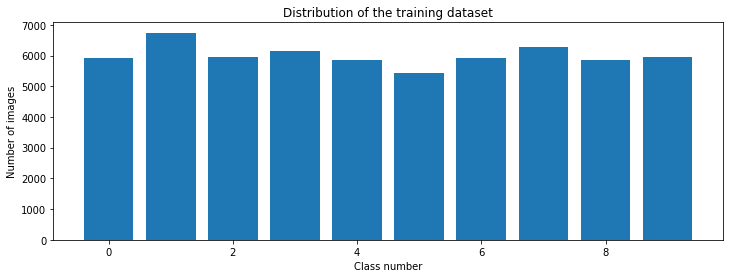

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

# 2.1 one hot encoding

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
print(y_train.shape)

(60000, 10)


In [9]:
print(y_test.shape)

(10000, 10)


# 2.2 Image normalization

In [10]:
X_train = X_train/255 
X_test = X_test/255

# 2.3 Reshaping of the dataset

In [11]:

#Since each image is 28x28, we simply use reshape the full dataset to [-1 (all elements), height * width]
#X_train = X_train.reshape(-1, 28*28)

#we can do in below way also
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Stage 3: Building an Artificial Neural network

In [13]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#784*10+10=7850,  10 are 1 bias term each for 10 neurons
#10*30+30=330,   30 are 1 bias term each for 30 neurons
#30*10+10=310,   10 are 1 bias term each for 10 neurons
#10*10+10=110,   10 are 1 bias term each for 10 neurons
#7850+330+310+110=8600

# Stage 4: Training the model

In [16]:
#validation split is 10% of train data . Validation data is used to train hyperparameter
#so final training data=60000*0.9=54000
#validation data =60000*0.1=6000
#the more epoch we run, training and validation error will approach each other.After certain epoch training loss will be less than validation loss
#Thats when we overfit our model.Our model will keep memorising the training set and failed to generalise the validation data
#so we have to choose no of epochs and no of hidden layers  carefully.

history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.6331 - accuracy: 0.8050 - val_loss: 0.3223 - val_accuracy: 0.9035
Epoch 2/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3840 - accuracy: 0.8904 - val_loss: 0.2911 - val_accuracy: 0.9125
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.3417 - accuracy: 0.9004 - val_loss: 0.2818 - val_accuracy: 0.9152
Epoch 4/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.3268 - accuracy: 0.9038 - val_loss: 0.2669 - val_accuracy: 0.9175
Epoch 5/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3174 - accuracy: 0.9070 - val_loss: 0.2946 - val_accuracy: 0.9100
Epoch 6/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3042 - accuracy: 0.9095 - val_loss: 0.2409 - val_accuracy: 0.9275
Epoch 7/10
54000/54000 [==============================] - 2s 39us/ste

Text(0.5,0,'epoch')

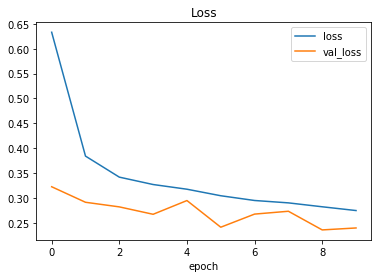

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

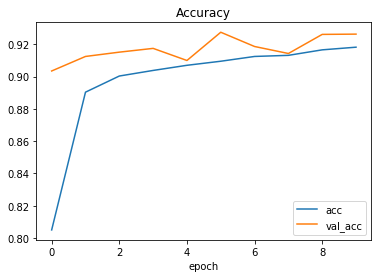

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 

# Stage 5: Model evaluation and prediction

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.29582403110861777
Test accuracy: 0.9150000214576721


# Prediciting for a random test data

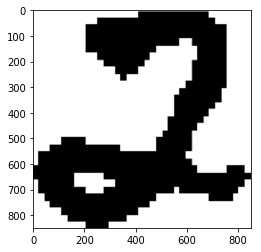

In [20]:
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (850, 850, 4)
size of iamge after resize:  (28, 28, 4)
size of iamge after resize AND GRAYSCALE implementation:  (28, 28)


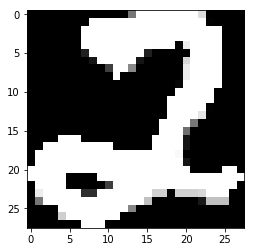

In [21]:
#our model is trained on 28*28 pixels  and on grayscale. So we hAVE TO CHANGE OUR TEST IMAGE SIMILAR TO OUR TRAINING DATA 


import cv2
 
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (28, 28))
print('size of iamge after resize: ',img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('size of iamge after resize AND GRAYSCALE implementation: ',img.shape)
#our image is trained on black background and data in white.But given image isof oppsite order. so we need to change that
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255

In [22]:
img = img/255
img = img.reshape(1, 784)
print('shape of given image is: ',img.shape)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

shape of given image is:  (1, 784)
predicted digit: [7]


In [24]:
#Since prediction is not exact. so we  need to  increase our accuracy 
#It can be achieved by CNN